#### ■モジュール読み込み

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# モデル作成のモジュール（最小二乗法＋L2正則化項 を搭載）
from sklearn.linear_model import Ridge

# データ読み込み
from sklearn.datasets import load_boston

# 学習データとテストデータの分割をするモジュール
from sklearn.model_selection import train_test_split

# 標準化を行うモジュール
from sklearn.preprocessing import StandardScaler

# 訓練データに交差検証を行うモジュール
from sklearn.model_selection import cross_val_score

# cross_val_scoreを簡単に行えるモジュール
from sklearn.linear_model import RidgeCV

# 最適な alpha を求めるモジュール
from yellowbrick.regressor import AlphaSelection

#### ■データの準備

In [8]:
# Bostonデータセットを読み込む（データに様々なメソッドを適用できるようインスタンスを作成）
boston = load_boston()

# 目的変数と説明変数に分ける
X, y = boston.data, boston.target

# 学習データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [9]:
# 標準化のインスタンス（関数）を作成
SS = StandardScaler()

# 説明変数Xの標準化（trainとtest、両方やること）
X_train = SS.fit_transform(X_train)
X_test = SS.fit_transform(X_test)

# 数値の大きい特徴量の方が影響力が大きくなってしまうため、z変換して大きさを揃える（教科書に書いてある分散正規化）

#### ■パラメータの探索

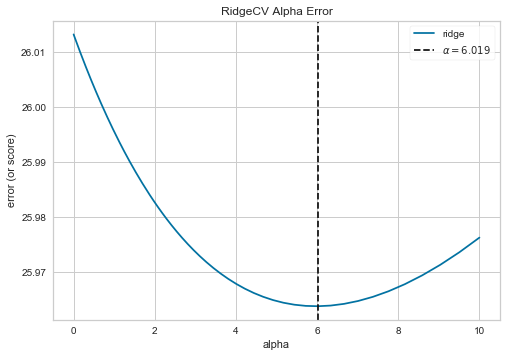

In [10]:
# 先にパラメータ（alpha）の最適値を求める（本来はRidge.fitする前に求めておく）

# alpha の探索範囲を設定
alphas = np.logspace(-10, 1, 500)

# Ridgeでtrainデータにfitさせ、trainデータの交差検証で最適な alpha を求める
# どの alpha もとれるように、変数として設定しておく
RidgeCV = RidgeCV(alphas = alphas)


visualizer = AlphaSelection(RidgeCV)

visualizer.fit(X_train, y_train)
visualizer.show()

plt.show()

#### ■RIdge回帰（正則化追加で最小二乗法、モデル式作成）

In [19]:
# Ridge回帰の適用関数を作成（インスタンス）、またデフォルトで alpha = 1 となっている
Ridge = Ridge(alpha = 5)

# モデルの作成を行う（最小二乗法により、微分して各重みを求め、直線の式を作成する）
Ridge.fit(X_train, y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [20]:
# 切片（モデル式の重み：切片wo）を求める
Ridge.intercept_

22.54858757062152

In [21]:
# 回帰係数（モデル式の重み：傾きw1～w13）を求める
print(Ridge.coef_)

[-0.86128002  0.94578275 -0.10081439  0.90943249 -2.24874809  2.32760914
 -0.19192003 -3.28350561  2.21287931 -1.23484834 -1.98464011  0.61387361
 -4.08671229]


In [22]:
# 学習データに対する予測値を出す（モデル作成にした学習データも、実際にx_trainを代入して、どの程度y_trainに近づくかを見れる）
y_train_pred = Ridge.predict(X_train)

# テストデータに対する予測値を出す
y_test_pred = Ridge.predict(X_test)

In [23]:
y_train_pred[:10]

array([35.4733788 , 28.11400551, 26.24746705, 20.53952227, 25.30399393,
       27.15151933, 25.11501819, 15.49999452, 44.69608251, 32.21813742])

In [24]:
y_test_pred[:10]

array([19.62992771, 19.04314091, 24.68861164,  7.25525016, 13.91172409,
       30.4203441 , 17.26415023, 20.84672894,  9.31788537, 13.9511836 ])

#### ■残差プロット

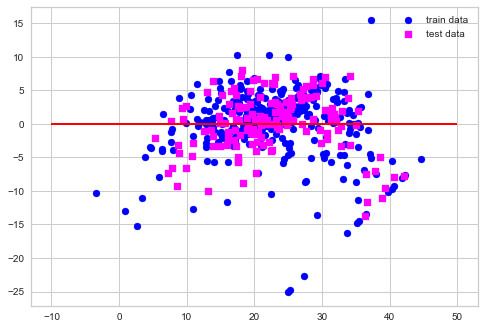

In [25]:
# 作成したモデルの性能を見るために、残差をプロットする（評価の前に、まずは残差を見る）
fig, ax = plt.subplots()

# 残差をプロットする
ax.scatter(y_train_pred, y_train_pred - y_train, color = 'Blue', marker = 'o', label = 'train data')
ax.scatter(y_test_pred, y_test_pred - y_test, c = 'Magenta', marker = 's', label = 'test data') # cと略してもいける

# y = 0 の直線をプロットする（赤線が正解データとなり、そこからどのくらい差があるのかが見れる）
ax.hlines(y = 0, xmin = -10, xmax = 50, linewidth = 2, color = 'red')
 
# 軸ラベルを設定する（x：予測値、y：残差）
ax.set_xlabel = ('Predict Values')
ax.set_ylabel = ('Residuals')

# 凡例の設定
ax.legend(loc = 'best')

# プロットを出力する
plt.show()

# 下記だと残差を中心に、上下の割合がバランスよく散らばっているので問題なし（赤線より上のみや、下のみの点が多いと問題あり）
# ただし、右下に直線的な関係がみられるため、もしかしたら正則化をした方が良いかもしれない
# 下記は alpha = 1 よりも 100 の方が、test data の残差のばらつきがバランス良かった

#### ■性能評価

In [26]:
# 平均二乗誤差（MSE）を使用するメソッドの呼び出し
from sklearn.metrics import mean_squared_error

# 平均二乗誤差を求める（少数点第3桁まで出す）
print('MSE train : %.3f' % (mean_squared_error(y_train, y_train_pred)))
print('MSE test : %.3f' % (mean_squared_error(y_test, y_test_pred)))

# 決定係数を求める（引数を訓練データごと、テストデータごとに取る）
print('R^2 train : %.3f' % (Ridge.score(X_train, y_train)))
print('R^2 test : %.3f' % (Ridge.score(X_test, y_test)))

MSE train : 23.996
MSE test : 18.214
R^2 train : 0.723
R^2 test : 0.770


In [27]:
# cross_val_score（交差検証 + 決定係数）を求める、通常と同じくテストデータにも適用する
score_train = cross_val_score(Ridge, X_train, y_train, cv = 5)
score_test = cross_val_score(Ridge, X_test, y_test, cv = 5)

# 5回分の決定係数を出力する
print(score_train)
print(score_test)

[0.68646794 0.56408982 0.67744499 0.72752722 0.72740037]
[0.75461886 0.62611706 0.52950948 0.81636183 0.84803126]


In [28]:
# 平均値を算出
print('cross_val_R^2 train : %.3f' % (score_train.mean()))
print('cross_val_R^2 test : %.3f' % (score_test.mean()))

# cross_val_score はあくまで精度の高い評価指標である

# RidgeCV（Ridge回帰のインスタンス作成 + 交差検証 + 決定係数）のやり方もあるが、上でパラメータの探索ですでに定義してしまっているので不可

cross_val_R^2 train : 0.677
cross_val_R^2 test : 0.715


Ridge回帰のコード：https://panda-clip.com/ridgecv/<br>
X_trainの標準化：https://sigma-eye.com/2019/01/12/standardization-regression-analysis/<br>
trainデータの交差検証法：https://qiita.com/tomov3/items/039d4271ed30490edf7b<br>
AlphaSelection：https://blog.ikedaosushi.com/entry/2019/05/16/192708